# Echantillonnage d’importance adaptatif en Population Monte-Carlo

## 1. Echantillonnage d’importance et optimalité au sens de la variance asymptotique

### T1
On suppose que $\int|h(x)|\pi(x)dx < \infty$, quel théorème peut-on utiliser pour prouver que $\tilde{\Pi}_{g,n}(h)$ converge avec probabilité 1 vers $\Pi(h)$?

En notant $Y_i = h(X_i) \frac{\pi(X_i)}{g(Xi)}$, on peut utiliser la Loi Forte des Grands Nombres pour montrer que $\frac{1}{n} \sum_{i=1}^n Y_i \xrightarrow[]{p.s.} \mathbb{E}_g(Y_i)$.

Puisque $\mathbb{E}_g(Y_i) = \int h(X_i) \frac{\pi(X_i)}{g(Xi)} g(x) dx$, cela revient exactement à montrer que $\tilde{\Pi}_{g,n}(h) \rightarrow \Pi(h)$ avec une probabilité 1.

### T2
Quel hypothèse faut-il ajouter pour obtenir la propriété: pour tout intervalle $I$, 
$\mathbb{P} \left( \sqrt{n} \left( \tilde{\Pi}_{g,n}(h) - \Pi(h) \right) / \sqrt{\tilde{V}_g(h)} \in I \right) \rightarrow \int_I \frac{e^{-x^2/2}}{\sqrt{2\pi}} dx$, 
avec $\tilde{V}_g(h) = \int \pi(x) h^2(x) \frac{\pi(x)}{g(x)} dx - \left[ \Pi(x) \right]^2$ ?

L'hypothèse à ajouter est que $Y_i$ soit de carré intégrable.

### S1

On prend pour $\Pi$ la loi uniforme sur [0,1] et on pose $h(x)=x$. Nous allons d'abord illustrer graphiquement en fonction de $n,$ I'approximation de $\Pi(h)$ par $\tilde{\Pi}_{g, n}(h)$ où on a posé $g=\pi .$ Pour cela, tirer $m=2000$ variables aléatoires $\left(X_{i}\right)_{1 \leq i \leq m}$ iid suivant une loi uniforme et tracer les valeurs prises par $\tilde{\Pi}_{g, n}(h)$ pour $n=1,2, \ldots, m$ On pourra aussi représenter les bornes inférieures et supérieures d'un intervalle de confiance à $95 \%$ de $\Pi(h)$ pour ces mêmes valeurs de $n$.

Ce rapport contient uniquement le code pour la visualisation. Vous trouverez l'implémentation de tous les algorithmes dans `spellbook.py`.

Ici, nous utilisons l'intervalle de confiance t, car on suppose que pour les grands n la distribution de $\tilde{\Pi}_{g, n}(h)$ est normale et que pour les grands n la distribution de Student est proche de la normale. En général, dans cet exemple, l'intervalle joue un rôle plutôt esthétique et la position exacte de ses limites n'est pas très importante.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline

SEED = 666

In [2]:
from scipy.stats import t
def visualize_simple_simulation(estimated_values, estimated, title, ylim):
    m = len(estimated)
    intervals = np.array([t.interval(0.95, n - 1, estimated[:n].mean(), estimated[:n].std()/n**0.5) for n in range(1, m+1)])
    plt.figure(figsize=(20, 10))
    plt.plot(estimated_values, label=r"$\tilde{\Pi}_{g, n}(h)$")
    plt.ylabel(r"$\tilde{\Pi}_{g, n}(h)$", size=16)
    plt.xlabel(r"$n$", size=16)
    plt.fill_between(np.arange(0, m, 1), intervals[:, 0], intervals[:, 1], color='green', alpha=.5, label=r"95% t-confint")
    plt.ylim(*ylim)
    plt.title(title, size=16)
    plt.legend(fontsize=16)
    plt.show()

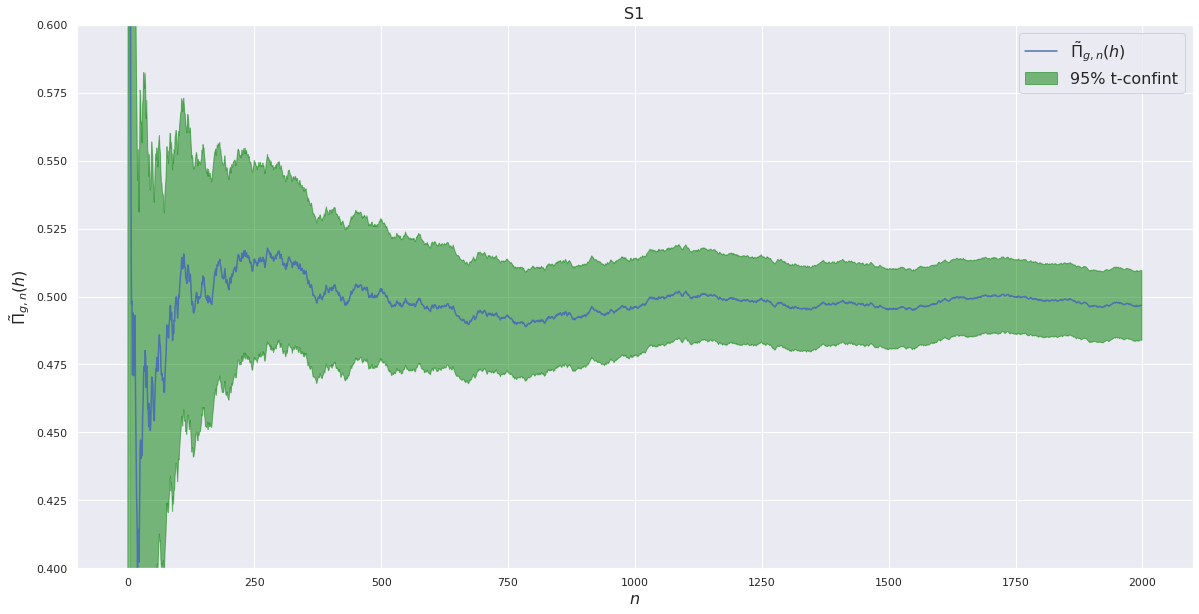

In [3]:
from spellbook import uniform_0_1, run_simple_simulation
np.random.seed(SEED)

def h(x):
    return x

M = 2000
estimated_values, estimated = run_simple_simulation(h, uniform_0_1, uniform_0_1, M)
visualize_simple_simulation(estimated_values, estimated, "S1", (0.4, 0.6))

Nous pouvons voir que notre estimateur approche la vraie valeur 0.5. L'intervalle de confiance diminue à chaque fois.

### S2

Reprendre la question précédente, en remplaçant la densité $g$ par $g:[0,1] \mapsto \mathbb{R}^{+}$ telle que $g(x)=\frac{5}{2} x^{3 / 2}$ pour $x \in[0,1] .$ Pour simuler une variable aléatoire $X$ suivant cette densité $g,$ on pourra utiliser (en la justifiant) la méthode suivante: tirer une variable aléatoire $U$ suivant une loi uniforme sur [0,1] et poser $X=U^{2 / 5}$. Vérifier expérimentalement qu'il vaut mieux utiliser la densité instrumentale définie sur [0,1] par $g(x)=\frac{5}{2} x^{3 / 2}$ plutôt que la densité instrumentale uniforme: $g(x)=1$ pour $x \in[0,1]$.

Comme $\tilde{G}^{-1}(x) = x^{2/5}$ sur $[0,1]$ est la fonction quantile de v.a. à densité $g$, la v.a. $X= \tilde{G}^{-1}(U) =U^{2 / 5}$ est à densité $g$.

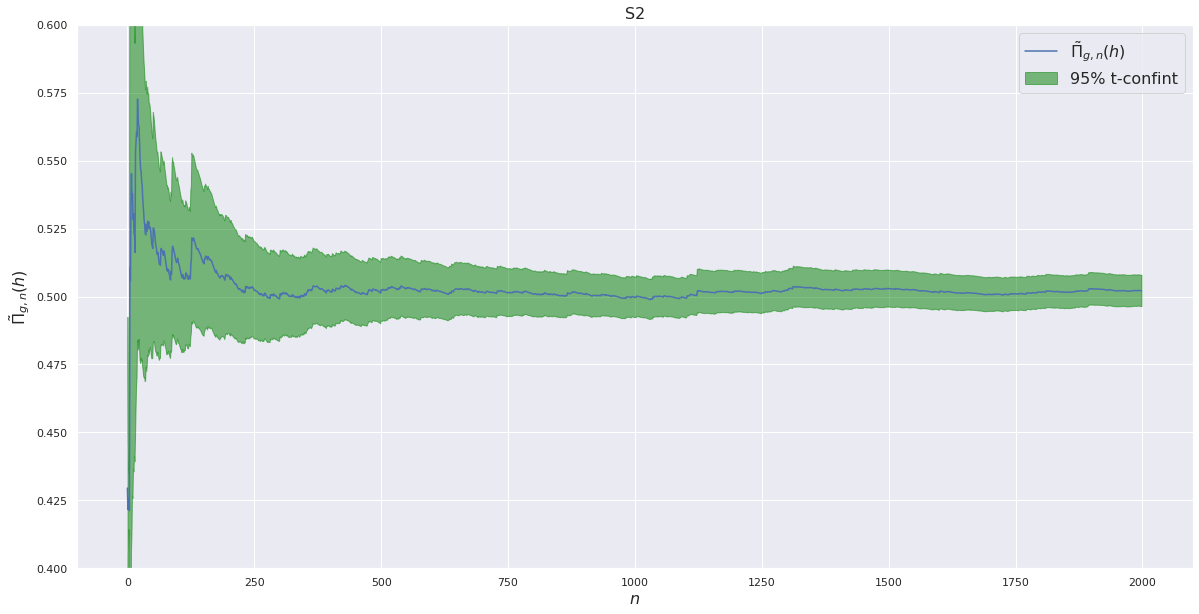

In [4]:
from spellbook import Distribution, g_polynomial
np.random.seed(SEED)

M = 2000
estimated_values, estimated = run_simple_simulation(h, g_polynomial, uniform_0_1, M)
visualize_simple_simulation(estimated_values, estimated, "S2", (0.4, 0.6))

Dans ce cas la convergence est beaucoup plus rapide, la taille limite de l'intervalle de confiance est moindre. Cela montre que la densité instrumentale $g(x)=\frac{5}{2} x^{3 / 2}$ est plus appropriée pour estimation.

### T3
En utilisant l’inégalité de Cauchy-Schwarz, montrer que $\int \pi(x) h^2(x) \frac{\pi(x)}{g(x)} dx \geq \left( \int \pi(x)|h(x)|dx \right)$

En décomposant $\pi(x)h(x)$ en $\frac{\pi(x)h(x)}{\sqrt{g(x)}} \cdot \sqrt{g(x)}$, l'inégalité de Cauchy-Schwarz donne :

$\left( \int |\pi(x)h(x)| dx \right)^2 \leq \int \frac{\pi^2(x)h^2(x)}{|g(x)|} dx \cdot \int |g(x)|dx $

Par positivité de $\pi$ et $g$ qui sont des densités de probabilité,

$\left( \int \pi(x)|h(x)| dx \right)^2 \leq \int \frac{\pi^2(x)h^2(x)}{g(x)} dx \cdot \int g(x)dx $

Et puisque $g$ est une densité de probabilité, $\int g(x) dx = 1$, ce qui aboutit à l'inégalité demandée.

### T4
En déduire que $\tilde{V}_g(h) \geq \tilde{V}_{\tilde{g}}(h)$, avec $\tilde{g} = \frac{|h(x)| \pi(x)}{\int |h(y)|\pi(y) dy}$

$\tilde{V}_{\tilde{g}}(h) = \left( \int \pi(x)|h(x)| dx \right)^2 - \left[ \Pi(x) \right]^2$

Donc d'après la question précédente, il vient directement que $\tilde{V}_{\tilde{g}}(h) \leq \tilde{V}_g(h)$.
D'après Cauchy-Schwarz, il y a égalité lorsque $\frac{\pi(x)h(x)}{\sqrt{g(x)}}$ et $\sqrt{g(x)}$ sont proportionnels, soit lorsque $g(x) = \lambda \pi(x)h(x)$, avec $\lambda \in \mathbb{R}$.

### S3

Simulation. En guise d'illustration de la question précédente, on prendra pour $\Pi$ la loi $\mathcal{N}(0,1)$ et on posera $h(x)=x .$ Ecrire la densité $\tilde{g} .$ Calculer la fonction de répartition de $\tilde{g} .$ En déduire une façon de simuler un échantillon $\left(X_{i}\right)_{1 \leq i \leq n}$ de variables aléatoires indépendantes et de même loi de densité $\tilde{g}$.

\begin{equation}
\begin{split}
\int|h(y)| \pi(y) d y & = \int|y|\frac{1}{\sqrt{2 \pi}} \exp \left(-\frac{-y^{2}}{2}\right) d y = 2\int_{0}^{+\infty}y\frac{1}{\sqrt{2 \pi}} \exp \left(-\frac{-y^{2}}{2}\right) d y \\
& = \frac{1}{\sqrt{2 \pi}} \int_{0}^{+\infty} \frac{e^{-\frac{u}{2}}}{2} d u = \sqrt{\frac{2}{\pi}}
\end{split}
\end{equation}

\begin{equation}
\tilde{g}(x)=\frac{|h(x)| \pi(x)}{\int|h(y)| \pi(y) d y} = \frac{1}{2}|x|\exp\left(-\frac{x^2}{2}\right)
\end{equation}

La fonction de répartition de $\tilde{g}$:

\begin{equation}
\tilde{G}(x) = \begin{cases}
   \frac{1}{2}\exp\left(-\frac{x^2}{2}\right), x \le 0 
   \\
   1 -  \frac{1}{2}\exp\left(-\frac{x^2}{2}\right), x > 0 
\end{cases}
\end{equation}

Pour faire un tirage de cette distribution nous allons aussi besoin la fonction réciproque de $\tilde{G}(x)$:

\begin{equation}
\tilde{G}^{-1}(x) = \begin{cases}
   -\sqrt{-2\ln(2x)}, 0 \le x \le \frac{1}{2}
   \\
   \sqrt{-2\ln(2-2x)}, \frac{1}{2} < x \le 1
\end{cases}
\end{equation}

La v.a. $\tilde{G}^{-1}(U)$ est donc de la loi $\tilde{G}$.

Vérifions que l'échantillonnage de $\tilde{g}$ fonctionne correctement :

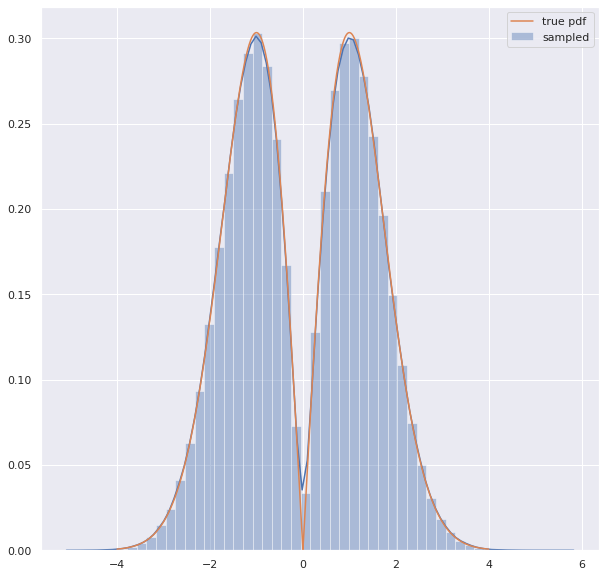

In [5]:
from spellbook import g_tilde
np.random.seed(SEED)

plt.figure(figsize=(10, 10))
x = np.linspace(-4, 4, 10000)
sns.distplot(g_tilde.sample(1000000), label="sampled")
plt.plot(x, g_tilde.pdf(x), label="true pdf")
plt.legend()
plt.show()

Vérifier par simulation l'inégalité de la question 4 en prenant pour $g$ la densité de la loi $\mathcal{N}(0,1)$.

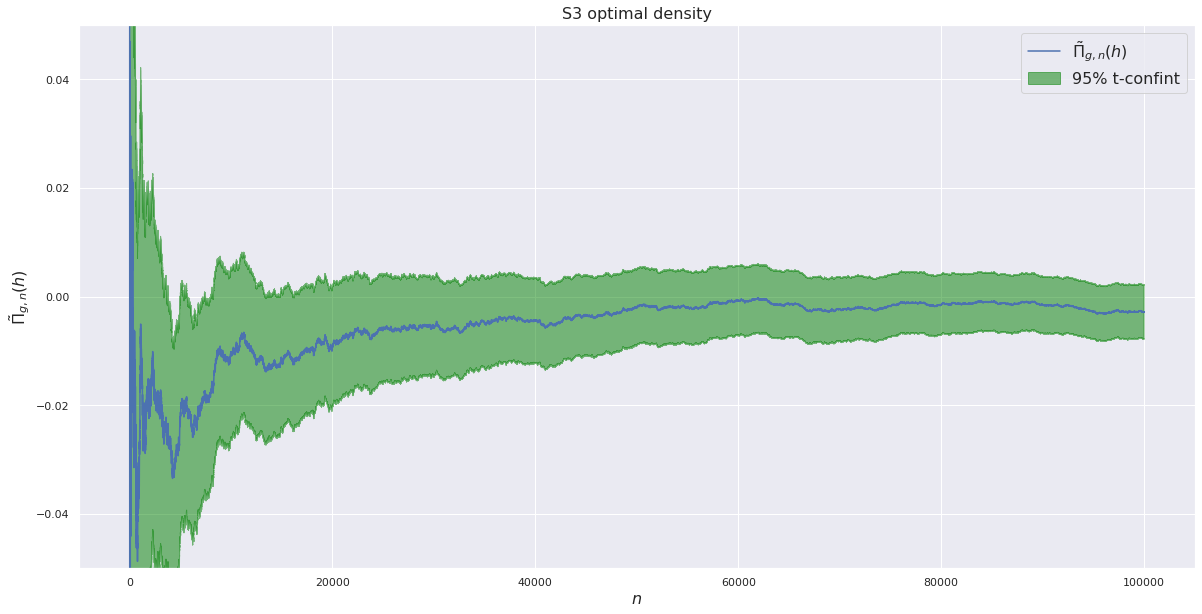

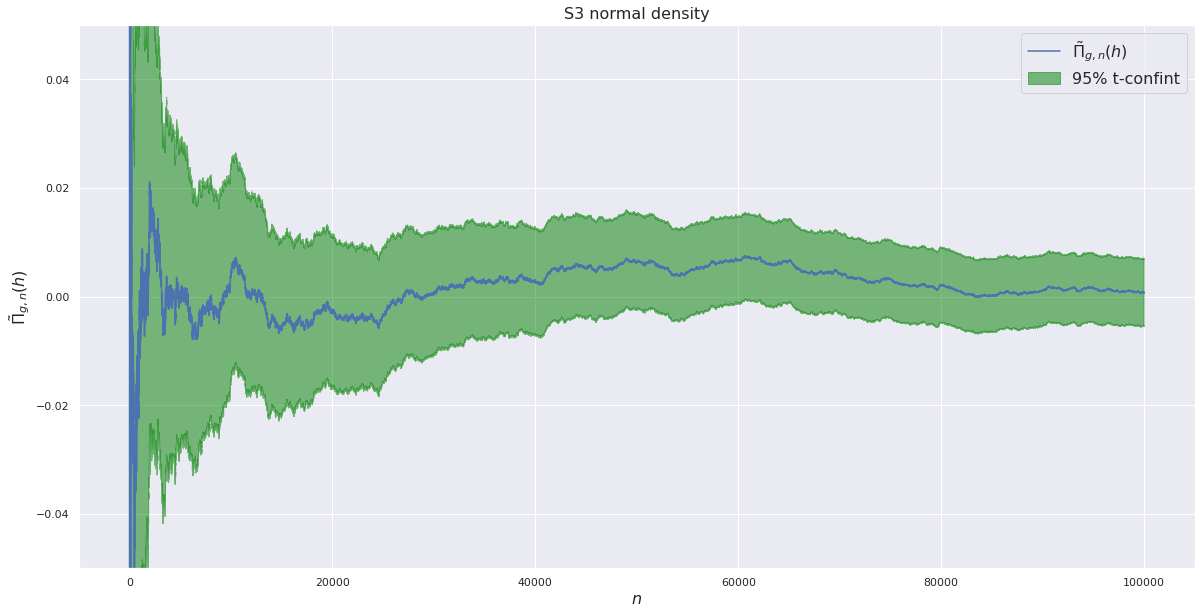

In [6]:
from spellbook import normal_standard
np.random.seed(SEED)

M = 100000
estimated_values_g_tilde, estimated_tilde  = run_simple_simulation(h, g_tilde, normal_standard, M)
visualize_simple_simulation(estimated_values_g_tilde, estimated_tilde, "S3 optimal density", (-0.05, 0.05))

M = 100000
estimated_values_normal_standard, estimated_normal = run_simple_simulation(h, normal_standard, normal_standard, M)
visualize_simple_simulation(estimated_values_normal_standard, estimated_normal, "S3 normal density", (-0.05, 0.05))

Ici l'éstimateur avec la densité instrumentale optimale a les plus courts intervales de confiance. Il semble que sa variance soit aussi la plus faible. Pour vérifier cela faisons un tirage de la grandeur $\sqrt{n}\left(\tilde{\Pi}_{g, n}(h)-\Pi(h)\right)$ suivante: pour $m=100$ tirons $\tilde{\Pi}_{g, m}(h)$ $10000$ fois.

In [7]:
np.random.seed(SEED)

est_tilde = []
est_norm = []

M = 100
for i in range(10000):
    est_tilde.append(run_simple_simulation(h, g_tilde, normal_standard, M)[0][-1]*M**0.5)
    est_norm.append(run_simple_simulation(h, normal_standard, normal_standard, M)[0][-1]*M**0.5)

Visualisons les distributions de $\sqrt{n}\left(\tilde{\Pi}_{g, n}(h)-\Pi(h)\right)$ obtenues.

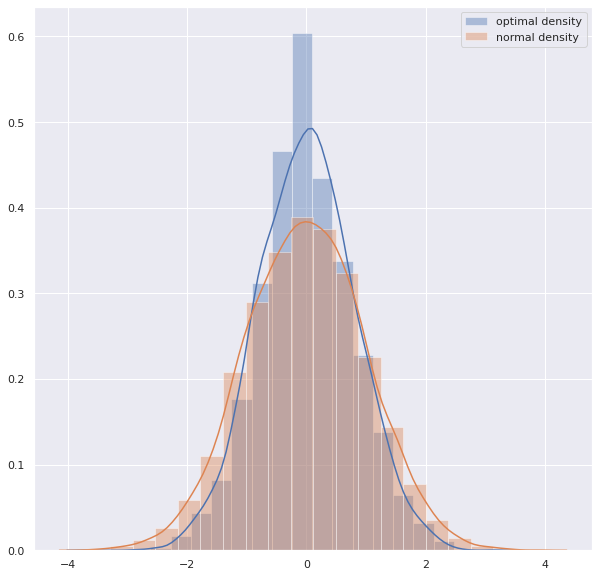

In [8]:
plt.figure(figsize=(10, 10))
sns.distplot(est_tilde, bins=20, label="optimal density")
sns.distplot(est_norm, bins=20, label="normal density")
plt.legend()
plt.show()

Les valeurs de la variance estimées:

In [9]:
print(np.array(est_tilde).var(), np.array(est_norm).var())

0.6473688119286807 1.0003134790472354


Cela confirme l'inegalité $\tilde{V}_{g}(h) \geq \tilde{V}_{\tilde{g}}(h)$. Les variances sont presques aux variances des valeurs $h\left(X\right) \frac{\pi\left(X\right)}{g\left(X\right)}$. Ceci est cohérent avec TLC:

In [10]:
print(estimated_tilde.var(), estimated_normal.var())

0.6366377865777144 0.9961142087693273


## 2. Réduction systématique de la variance

### T6
Vérifier que $\frac{\sigma^2(F(\alpha))}{\sigma^2(\alpha)} = \displaystyle{\int} \frac{\pi^2(x) h^2(x)}{\sum_{i=1}^d \alpha_i g_i(x)} \left( \displaystyle{\sum_{i=1}^d} \frac{\alpha_i g_i(x)}{\sum_{j=1}^d \alpha_j g_j(x)} \int \frac{g_i(u) \pi^2(u) h^2(u)}{[\sum_{k=1}^d \alpha_k g_k(u)]^2} du \right)^{-1} dx$


$\frac{\sigma^2(F(\alpha))}{\sigma^2(\alpha)} = \displaystyle{\int} \pi^2(x) h^2(x) \left( \displaystyle{\sum_{i=1}^d} \alpha_i \int \frac{g_i(u) \pi^2(u) h^2(u)}{[\sum_{k=1}^d \alpha_k g_k(u)]^2} du \cdot g_i(x) \right)^{-1} dx$

Puis en multipliant "en haut et en bas" par $\sum_{i=1}^d \alpha_i g_i(x)$ on obtient le résultat attendu.

### T7 #TODO

### T8 (Pas trop sûr)
Montrer que $n^{-1}\sum_{i=1}^n \left( \frac{h(X_i^t)\pi(X_i^t)}{\sum_{s=1}^d \tilde{\alpha}_s^t g_s(X_i^t)} \right)^2 \mathbb{1}_{Z_i^t = k}$ converge avec une probabilité 1 vers $\tilde{\alpha}_k^t \int g_k(x) \frac{\pi^2(x) h^2(x)}{[\sum_{i=1}^d \tilde{\alpha}_i^t g_i(x)]^2}$

En notant $Y_i^t = \frac{h(X_i^t)\pi(X_i^t)}{\sum_{s=1}^d \tilde{\alpha}_s^t g_s(X_i^t)}$,
la Loi Forte des Grands Nombres donne :

$\frac{1}{n} \sum_{i=1}^n (Y_i^t)^2 \mathbb{1}_{Z_i^t = k} \xrightarrow[]{p.s.} \displaystyle{\int} \left( \frac{h(x)\pi(x)}{\sum_{s=1}^d \tilde{\alpha}_s^t g_s(x)} \right)^2 \; f_{(X_i^t \cap Z_i^t = k)}(x) dx$ 

Et $f_{(X_i^t \cap Z_i^t = k)}(x) = f_{(X_i^t \; | \; Z_i^t = k)}(x) \cdot \mathbb{P}(Z_i^t = k) = g_k(x) \cdot \tilde{\alpha}_k^t$, d'où le résultat attendu.

### T9
En déduire que $n^{-1}\sum_{i=1}^n \left( \frac{h(X_i^t)\pi(X_i^t)}{\sum_{s=1}^d \tilde{\alpha}_s^t g_s(X_i^t)} \right)^2$ converge avec probabilité 1 vers $\sigma^2(\tilde{\alpha}^t)$.

En reprenant les notations de la question précédente :

$n^{-1}\sum_{i=1}^n (Y_i^t)^2 = \displaystyle{\sum_{k=1}^d} \left[ n^{-1}\sum_{i=1}^n (Y_i^t)^2 \mathbb{1}_{Z_i^t = k} \right]$

Donc d'après la question précédente :

$n^{-1}\sum_{i=1}^n (Y_i^t)^2 \xrightarrow[]{p.s.} \displaystyle{\sum_{k=1}^d} \tilde{\alpha}_k^t \int g_k(x) \frac{\pi^2(x) h^2(x)}{(\sum_{s=1}^d \tilde{\alpha}_s^t g_s(x))^2} dx $ 

En permutant les sommes on obtient :

$n^{-1}\sum_{i=1}^n (Y_i^t)^2 \xrightarrow[]{p.s.} \int g_k(x) \frac{\pi^2(x) h^2(x)}{\sum_{s=1}^d \tilde{\alpha}_s^t g_s(x)} dx = \sigma^2(\tilde{\alpha}^t)$

### S4

On mettra en oeuvre l'algorithme sur un exemple où la loi $\Pi$ visée est une $\mathcal{N}(0,1), h(x)=x, d=3,$ et les densités $g_{1}$ et $g_{2}$ sont respectivement la densité d'une $\mathcal{N}(0,1),$ la densité $\tilde{g}$ définie dans la partie 1 et $g_{3}$ est une densité simulable quelconque.

Comme $g_3$ j'ai choisi la distribution de Laplace avec la densite $g_3(x)=\frac{1}{2} \exp (-|x|)$.

In [11]:
from spellbook import laplace, AdaptiveSampling
np.random.seed(SEED)

advs = AdaptiveSampling(h, [normal_standard, g_tilde, laplace], normal_standard)
history = advs.fit()

Algorithm converged on iteration 77


Visualisons quelques resultats.

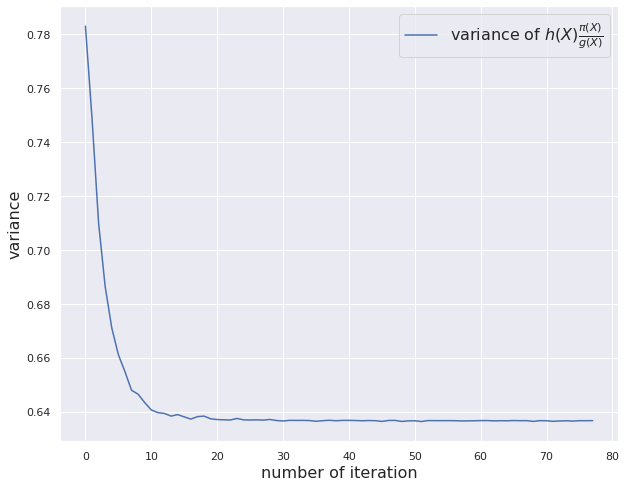

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(history["variance_log"], label=r"variance of $h\left(X\right) \frac{\pi\left(X\right)}{g\left(X\right)}$")
plt.xlabel("number of iteration", size=16)
plt.ylabel("variance", size=16)
plt.legend(fontsize=16)
plt.show()

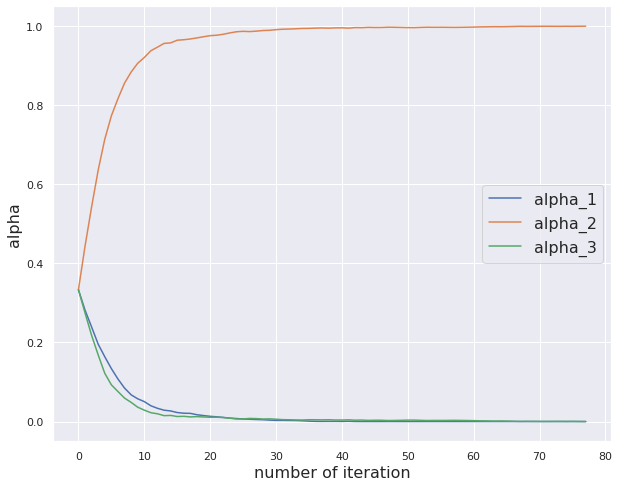

In [13]:
plt.figure(figsize=(10, 8))
plt.plot(np.vstack(history["alphas_log"])[:, 0], label="alpha_1")
plt.plot(np.vstack(history["alphas_log"])[:, 1], label="alpha_2")
plt.plot(np.vstack(history["alphas_log"])[:, 2], label="alpha_3")
plt.xlabel("number of iteration", size=16)
plt.ylabel("alpha", size=16)
plt.legend(fontsize=16)
plt.show()

In [14]:
print(*advs.alphas)

0.0 1.0 0.0


Le résultat est totalement attendu: l'algorithme a choisi la distribution optimale parmi disponible. Cela prouve une fois de plus que l'on ne peut faire mieux que $\tilde{g}$.

### S5

On cherchera aussi des exemples numériques pour $\Pi$ où on mettra en évidence que les $\tilde{\alpha}_{i}^{t}$ peuvent converger vers des quantités différentes de 0 et 1.

Posons la loi $\Pi$ visée est une $U(0,1), h(x)=x, d=3,$ et les densités $g_{3}$ et $g_{1}$ sont respectivement la densité de S1, la densité de S2 et $g_{2}$ est une densité suivante: $g_{2}(x)=\frac{1}{\ln2}\frac{1}{x+1}$ sur [0,1].

In [15]:
from spellbook import g_hyperbolic
np.random.seed(SEED)

advs = AdaptiveSampling(h, [g_polynomial, g_hyperbolic, uniform_0_1], uniform_0_1)
history = advs.fit(tolerance=1e-4)

Algorithm converged on iteration 121


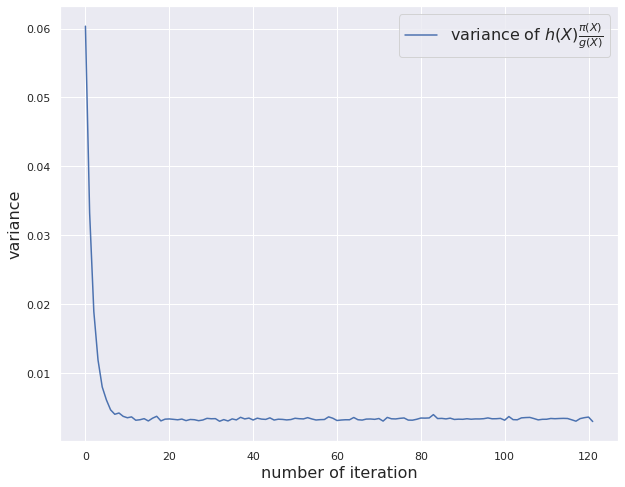

In [16]:
plt.figure(figsize=(10, 8))
plt.plot(history["variance_log"], label=r"variance of $h\left(X\right) \frac{\pi\left(X\right)}{g\left(X\right)}$")
plt.xlabel("number of iteration", size=16)
plt.ylabel("variance", size=16)
plt.legend(fontsize=16)
plt.show()

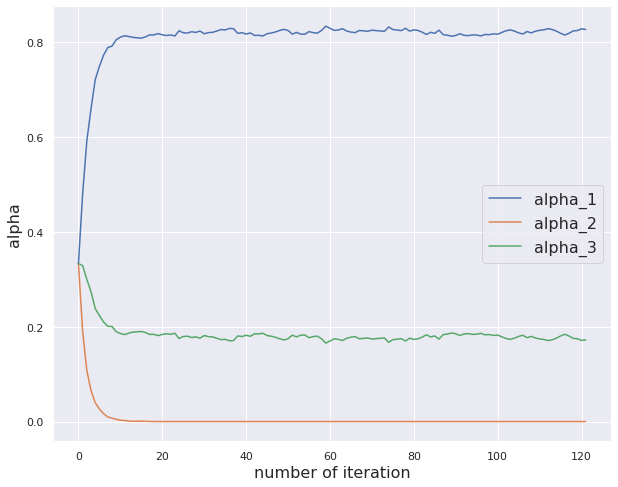

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(np.vstack(history["alphas_log"])[:, 0], label="alpha_1")
plt.plot(np.vstack(history["alphas_log"])[:, 1], label="alpha_2")
plt.plot(np.vstack(history["alphas_log"])[:, 2], label="alpha_3")
plt.xlabel("number of iteration", size=16)
plt.ylabel("alpha", size=16)
plt.legend(fontsize=16)
plt.show()

In [18]:
print(*advs.alphas)

0.8274335098105728 0.0 0.17256649018942707


Nous voyons que s'il n'y a pas de distribution optimale entre les distributions disponibles, l'algorithme est capable de converger vers des coefficients plus divers.

### S6

On mettra en évidence aussi la décroissance systématique de la variance à chaque itération de l'algorithme sur un exemple simple que vous choisirez.

Pour cette dernière simulation nous allons reprendre la configuration de S5. Après chaque itération de l'algoritme on va répéter le processus de S3. Pour faire cela utilosons le mode débogage de l'algoritme: `debug = True`. 

In [19]:
np.random.seed(SEED)

advs = AdaptiveSampling(h, [g_polynomial, g_hyperbolic, uniform_0_1], uniform_0_1)
history = advs.fit(max_iter=20, debug=True)

Maximal iteration (20) is reached


Visualisons les distributions.

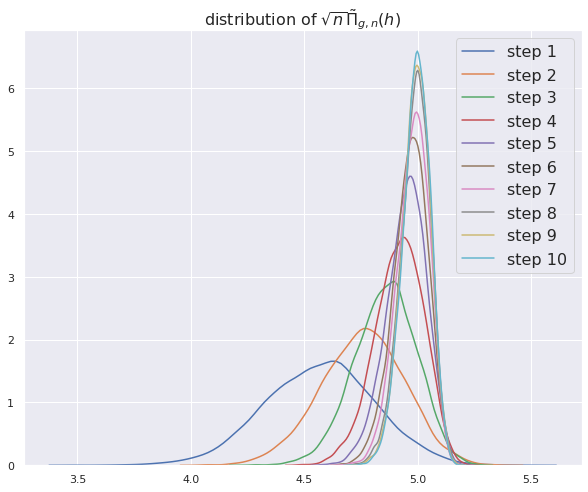

In [20]:
plt.figure(figsize=(10, 8))

for i in range(10):
    sns.distplot(history["global_estimation_log"][i], label=f"step {i+1}", hist=False)
plt.legend(fontsize=16)
plt.title(r"distribution of $\sqrt{n}\tilde{\Pi}_{g, n}(h)$", size=16)
plt.show()

On peut voir qu'à chaque étape la variance est réduite. Visualisons les variance elles-mêmes.

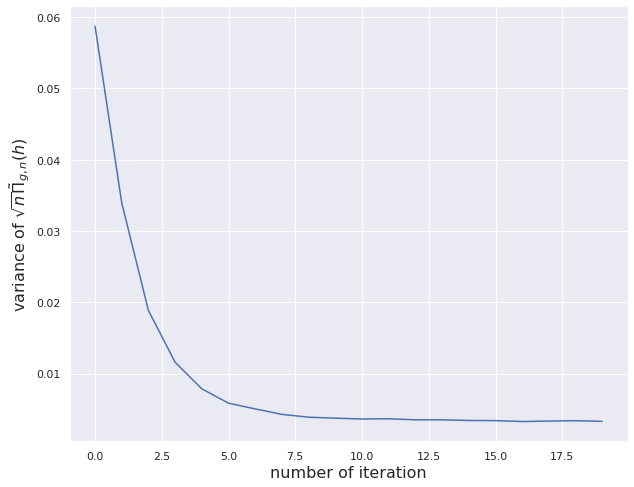

In [21]:
plt.figure(figsize=(10, 8))
plt.plot([history["global_estimation_log"][i].var() for i in range(20)])
plt.xlabel("number of iteration", size=16)
plt.ylabel(r"variance of $\sqrt{n}\tilde{\Pi}_{g, n}(h)$", size=16)
plt.show()

Nous sommes enfin convaincus que l'algorithme proposé réduit la variance.